In [6]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def head(X: list, n = 5) -> list:
    """
    return `n` (default is 5) first rows of a 2D list
    ### Parameters
    `X` : The 2D list
    `n` : number of first rows
    ### Example
    ```python
    >>> X = [[1,2], [3,4], [5,6]]
    >>> print(head(X))
    [[1,2],
     [3,4],
     [5,6]]
    >>> print(head(X,2))
    [[1,2],
     [3,4]]
    ```
    """
    return X[:n]

def tail(X: list, n = 5) -> list:
    """
    return `n` (default is 5) last rows of a 2D list
    ### Parameters
    `X` : The 2D list
    `n` : number of last rows
    ### Example
    ```python
    >>> X = [[1,2], [3,4], [5,6]]
    >>> print(tail(X))
    [[1,2],
     [3,4],
     [5,6]]
    >>> print(tail(X,2))
    [[3,4],
     [5,6]]
    ```
    """
    return X[(-n):]

In [8]:
irisset = datasets.load_iris()
X = irisset.data
Y = irisset.target

In [20]:
head(X)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

[[ 8.06179978  0.30042062]
 [ 7.12868772 -0.78666043]
 [ 7.48982797 -0.26538449]
 [ 6.81320057 -0.67063107]
 [ 8.13230933  0.51446253]]


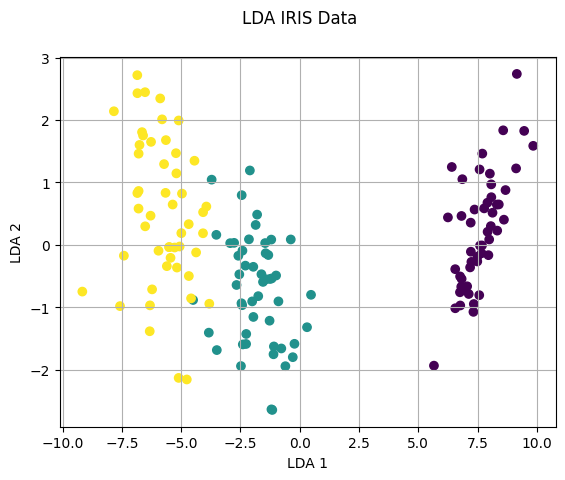

In [22]:
lda = LinearDiscriminantAnalysis(n_components=2)
# supervised learning
# maximises separation between different classes 
# of data and minimises of each individual class.
# This is done by projecting the data points
Xl = lda.fit(X,Y).transform(X)
print("First few row of LDA's projected data that maximises class separation", head(Xl))
plt.figure(1)
plt.scatter(Xl[:, 0], Xl[:, 1], c = Y)
plt.suptitle('LDA IRIS Data')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

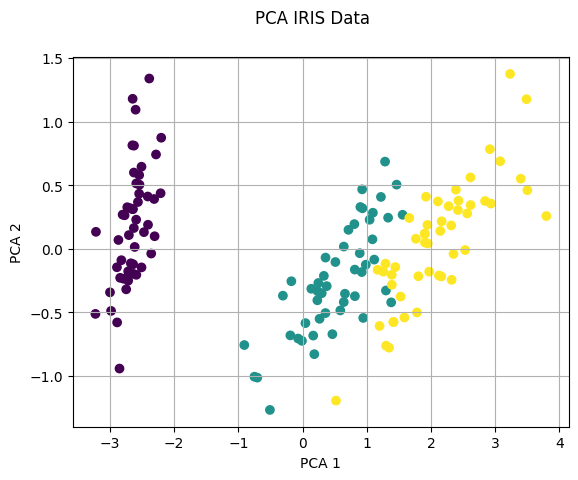

In [18]:
pca = PCA(n_components=2)
Xp = pca.fit(X).transform(X)
#Unsupervised learning
#components that capture the most variance

plt.figure(2)
plt.scatter(Xp[:, 0], Xp[:, 1], c = Y)
plt.suptitle('PCA IRIS Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

LDA accuracy score: 98.0 %
LDA explained variance ratio: [0.9912126 0.0087874]
LDA score: 0.98


<Axes: >

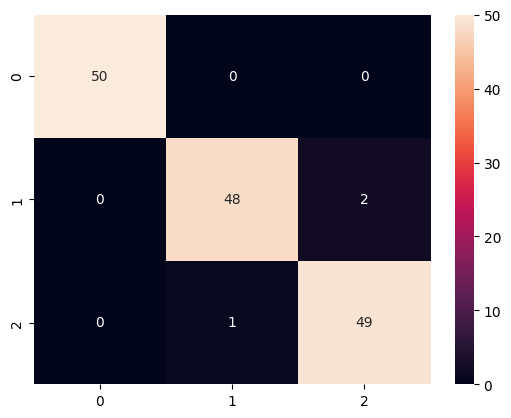

In [24]:
from sklearn.metrics import confusion_matrix
Y_pred_l = lda.predict(X)
cmat = confusion_matrix(Y, Y_pred_l)
print("LDA explained variance ratio:", lda.explained_variance_ratio_)
print("LDA mean accuracy score:", lda.score(X,Y))
sns.heatmap(cmat, annot=True)